In [1]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from plainNet import plainNet
from duffing_dataset import *

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
t = torch.linspace(0, data.DT * len(data.x), len(data.y))

training_loader = DataLoader(data, batch_size=100, shuffle=True)

In [4]:
model = plainNet(3, [[24, 24], [24, 24]], 2)

In [5]:
model.train_n_epochs(training_loader=training_loader, n_epochs = 1000, lr = 0.001, verbose=True)

Epoch 0: loss 0.15592192113399506
Epoch 100: loss 0.00011114033259218559
Epoch 200: loss 7.938123599160463e-05
Epoch 300: loss 0.00010287851910106838
Epoch 400: loss 5.612357199424878e-05
Epoch 500: loss 9.956956637324765e-05


In [ ]:
y_pred = model(training_loader.dataset.x)

In [ ]:
torch.sum((y_pred - training_loader.dataset.y)**2) / len(training_loader.dataset.y)

tensor(1.0292, grad_fn=<DivBackward0>)

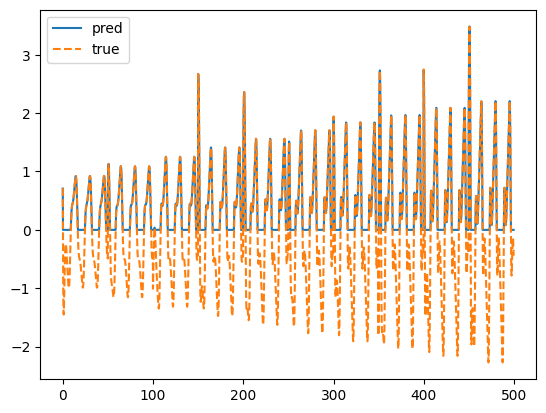

In [ ]:
plt.plot(t, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t, training_loader.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()